# How `Jaxley` indexes compartments and branchpoints

This tutorial is aimed at developers of `Jaxley`. It describes how indices in `Jaxley` are to be interpreted. Let's start with a simple example:

In [68]:
import jaxley as jx

comp = jx.Compartment()
branch = jx.Branch(comp, 1)
cell = jx.Cell(branch, [-1, 0, 0])
net = jx.Network([cell for _ in range(2)])

In [75]:
net.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,x,y,z,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,5.000000,5.000000,0.0,0,0,0,0
1,0,1,0,10.0,1.0,5000.0,1.0,-70.0,14.850713,3.787322,0.0,0,1,1,0
2,0,2,0,10.0,1.0,5000.0,1.0,-70.0,14.850713,6.212678,0.0,0,2,2,0
4,1,0,0,10.0,1.0,5000.0,1.0,-70.0,5.000000,0.000000,0.0,1,3,3,0
5,1,1,0,10.0,1.0,5000.0,1.0,-70.0,14.850713,-1.212678,0.0,1,4,4,0
6,1,2,0,10.0,1.0,5000.0,1.0,-70.0,14.850713,1.212678,0.0,1,5,5,0


As you can see, the `index` is not consecutive: it is missing a `3`. This is because `.nodes` does not display branchpoints. To see those, use:

In [70]:
net._branchpoints

,x,y,z,type
3,11.567142,0.0,0.0,branchpoint
7,11.567142,0.0,0.0,branchpoint


Because of branchpoints, you cannot assume that `.nodes.index` matches the global compartment index.

To see connections between compartments, inspect `._comp_edges`:

In [71]:
net._comp_edges

,source,sink,type
0,3,0,1
1,3,1,2
2,3,2,2
3,0,3,3
4,1,3,4
5,2,3,4
6,7,4,1
7,7,5,2
8,7,6,2
9,4,7,3


The `type` can be interpreted as follows:

`type == 0`: compartment <--> compartment (within branch)  
`type == 1`: branchpoint --> parent-compartment  
`type == 2`: branchpoint --> child-compartment  
`type == 3`: parent-compartment --> branchpoint  
`type == 4`: child-compartment --> branchpoint  

## Indexing in the graph backend

`Jaxley` also allows you to inspect any `Module` as a graph:

In [72]:
from jaxley.modules.base import to_graph
from jaxley.io.graph import vis_compartment_graph

In [73]:
net.cell(0).move(0, 5, 0, update_nodes=True)
comp_graph = to_graph(net)

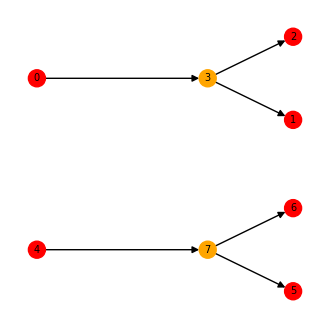

In [74]:
vis_compartment_graph(comp_graph)

Branchpoints are shown in orange, compartments in red. The node index matches to `net.nodes.index`.